# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Interpolación lineal a trozos.

### Ejercicios 6.- 
### Sea $\ell(x)$ la función interpoladora lineal a trozos de la función $f(x)=\dfrac{x}{1+3x^4}$ en los nodos
### $$  p_k=\cos\left(\Big(1-\frac{k}{12}\Big)\cdot \pi\right) \quad \mbox{con }k=0,1,\dots,12.$$

### (a) Representa gráficamente $f$ y $\ell(x)$.

### (b) Calcula una cota superior teórica del error absoluto $|f(x)-\ell(x)|$ para cualquier $x\in [-1,1]$.

### (c) Utiliza la función $\ell(x)$ para calcular una aproximación de $f(0.8)$ y comprueba que el error real de dicha aproximación es menor que la cota obtenida en el apartado (b). 

SOLUCIÓN

### (a) Representa gráficamente $f$ y $\ell(x)$.

Comezamos definiendo la función $f$.

In [1]:
f(x)=x/(1+3*x^4)
show(f)

x |--> x/(3*x^4 + 1)

<p>Primero definamos $\ell(x)$. Definimos una lista "X" con los nodos donde vamos a interpolar
$$  p_k=\cos\left(\Big(1-\frac{k}{12}\Big)\cdot \pi\right) \quad \mbox{con }k=0,1,\dots,12.$$
    y una lista "XY" con los correspondientes puntos del plano:
$$  (p_k,f(p_k)) \quad \mbox{con }k=0,1,\dots,12.$$</p>

In [2]:
n=12 
a=-1
b=1

In [3]:
X=[ numerical_approx(cos((1-k/12)*pi)) for k in range(0,n+1)] 
XY=[(X[k],f(X[k])) for k in range(0,n+1)]
show(X)
show(XY)

[-1.00000000000000,
 -0.965925826289068,
 -0.866025403784439,
 -0.707106781186548,
 -0.500000000000000,
 -0.258819045102521,
 0.000000000000000,
 0.258819045102521,
 0.500000000000000,
 0.707106781186548,
 0.866025403784439,
 0.965925826289068,
 1.00000000000000]

[(-1.00000000000000, -0.250000000000000),
 (-0.965925826289068, -0.267455526710577),
 (-0.866025403784439, -0.322242010710489),
 (-0.707106781186548, -0.404061017820884),
 (-0.500000000000000, -0.421052631578947),
 (-0.258819045102521, -0.255381131300774),
 (0.000000000000000, 0.000000000000000),
 (0.258819045102521, 0.255381131300774),
 (0.500000000000000, 0.421052631578947),
 (0.707106781186548, 0.404061017820884),
 (0.866025403784439, 0.322242010710489),
 (0.965925826289068, 0.267455526710577),
 (1.00000000000000, 0.250000000000000)]

In [4]:
len(X) 
#Para averiguar el tamaño de X usamos la sentencia len, como hemos
#dividido el intervalo [-1,1] en 12 subintervalos el tamaño debe ser 13

13

Para definir el polinomio interpolador lineal a trozos es importante definir previamente una función que  da la expresión de la <strong>recta que pasa por los puntos $(c,f(c))$ y $(d,f(d))$</strong>, siendo $c\neq d$:

$$ y = f(c) + \frac{f(d)-f(c)}{d-c}·(x-c) $$

La definimos en sage:

In [5]:
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)

<p>Definimos la <strong>función interpoladora lineal a trozos</strong> de $f$ en los nodos dados, y la llamamos "$L$", con la función de sage <strong>piecewise</strong>:</p>

In [6]:
L=piecewise([[(X[j],X[j+1]),r(X[j],X[j+1],x)] for j in range(0,n)],var=x); 
show(L)

piecewise(x|-->-0.512280264186609*x - 0.762280264186609 on (-1.00000000000000, -0.965925826289068), x|-->-0.548410933871409*x - 0.797179811156277 on (-0.965925826289068, -0.866025403784439), x|-->-0.514848453710933*x - 0.768113850723293 on (-0.866025403784439, -0.707106781186548), x|-->-0.0820427687626420*x - 0.462074015960268 on (-0.707106781186548, -0.500000000000000), x|-->0.686917838718221*x - 0.0775937122198369 on (-0.500000000000000, -0.258819045102521), x|-->0.986716921081349*x on (-0.258819045102521, 0.000000000000000), x|-->0.986716921081349*x on (0.000000000000000, 0.258819045102521), x|-->0.686917838718221*x + 0.0775937122198369 on (0.258819045102521, 0.500000000000000), x|-->-0.0820427687626420*x + 0.462074015960268 on (0.500000000000000, 0.707106781186548), x|-->-0.514848453710933*x + 0.768113850723293 on (0.707106781186548, 0.866025403784439), x|-->-0.548410933871409*x + 0.797179811156277 on (0.866025403784439, 0.965925826289068), x|-->-0.512280264186609*x + 0.762280264186609 on (0.965925826289068, 1.00000000000000); x)

Representamos ambas funciones, $f(x)$ y $\ell(x)$, junto con la malla de puntos $XY$.

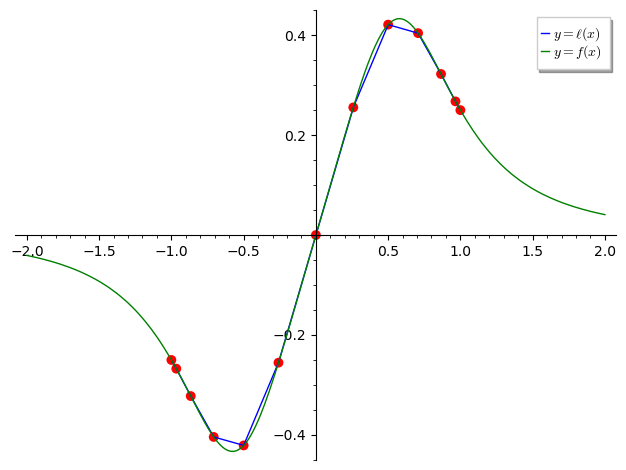

In [7]:
plot(L(x),(x,a,b),legend_label='$y=\ell(x)$')+point2d(XY,size=50,color='red')+plot(f(x),(x,-2,2),color='green',legend_label='$y=f(x)$')

### (b) Calcula una cota superior teórica del error absoluto $|f(x)-\ell(x)|$ para cualquier $x\in [-1,1]$.


#### Estudio del error cometido en la aproximación: 

En la interpolación lineal a trozos acotamos de la siguiente forma:

Dada una constante $M$ que cumpla $|f''(x)|\leq M$ para todo $x\in [a,b]$. 

La <strong>cota superior teórica</strong> del error absoluto $|f(x)-\ell(x)|$ para todo $x\in [a,b]$ es:
     $$\displaystyle cota=\frac{M}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2$$

Calculamos la derivada segunda de $f(x)$ y la representamos gráficamente (en valor absoluto) en dicho intervalo:

In [8]:
show(derivative(f(x),x,2))

288*x^7/(3*x^4 + 1)^3 - 60*x^3/(3*x^4 + 1)^2

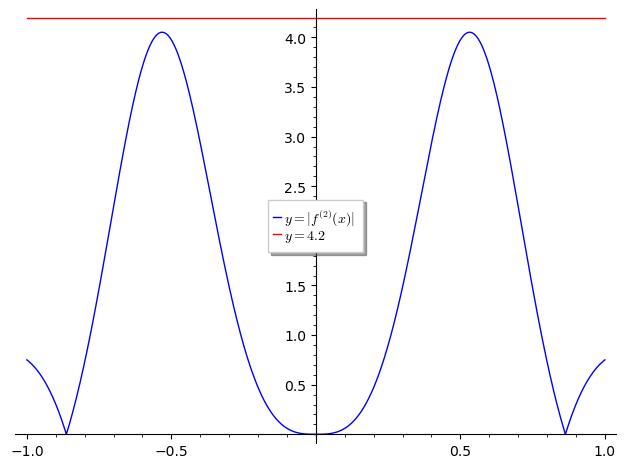

In [9]:
plot(abs(derivative(f(x),x,2)),a,b,legend_label='$y=|f^{(2)}(x)|$')+plot(4.2,color='red',legend_label='$y=4.2$')

En la gráfica anterior vemos que podemos tomar $M=4.2$.
La <strong>cota superior teórica</strong> del error absoluto  para todo $x\in [-1,1]$ es:
            $$\displaystyle cota=\frac{M}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2 =\frac{4.2}{8}\cdot \max_{j=0,\dots,11} \Big(\cos\left(\Big(1-\frac{j+1}{12}\Big)\cdot \pi\right)-\cos\left(\Big(1-\frac{j}{12}\Big)\cdot \pi\right)\Big)^2$$

In [10]:
M=4.2

In [11]:
cota=M/8*max((X[j+1]-X[j])^2 for j in range(0,n)); 
cota

0.0351683315065848

<p>Podemos comprobar que, efectivamente, el error absoluto de la función error real es menor que esta cota haciendo la representación gráfica de $|f(x)-\ell(x)|$:</p>

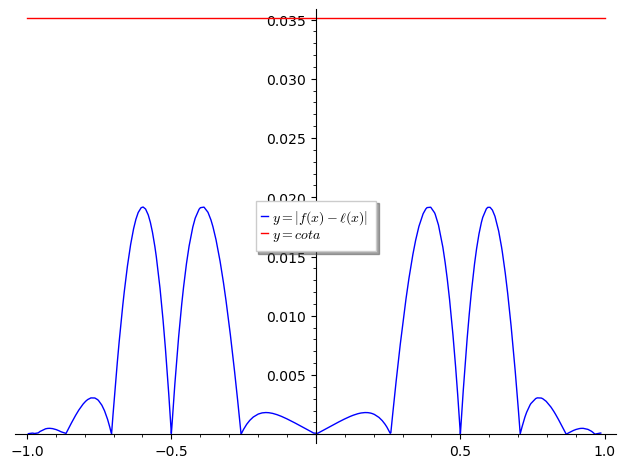

In [12]:
plot(abs(f(x)-L(x)),a,b,legend_label='$y=|f(x)-\ell(x)|$')+plot(cota,a,b,legend_label='$y=cota$',color='red')

### (c) Utiliza la función $\ell(x)$ para calcular una aproximación de $f(0.8)$ y comprueba que el error real de dicha aproximación es menor que la cota obtenida en el apartado (b). 

La aproximación de $f(0.8)$ es:

In [13]:
L(0.8)

0.356235087754547

El valor real es en cambio:

In [14]:
f(0.8)

0.358937544867193

En cualquier caso el error real en el valor $0.8$ es menor que la cota del apartado (b), es decir,
$$|f(0.8)-\ell(0.8)| \leq cota.$$

In [15]:
show(abs(f(0.8)-L(0.8)))#menor que la cota
show(cota)
abs(f(0.8)-L(0.8)).n() < cota.n()

0.00270245711264611

0.0351683315065848

True